## Part 1: TF-IDF
In this exercise, we start with the reddit submissions data and the dict of the 15 stocks we identified in the exercises.

In [23]:
#imports
import pandas as pd
import numpy as np
import nltk
import re
import os
from tqdm import tqdm, tqdm_pandas
#tqdm_pandas(tqdm())
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


#load data and dict
submissions = pd.read_csv(f"Week_6{os.sep}wallstreet_subs.csv", sep=',')

#Super smart method of using variables in jupyter notebooks. It pickles variables and makes it possible to
#retrieve them in other scripts :D
%store -r fdist2

In [24]:
submissions.head()

,created_utc,title,selftext,score
0,1586173811,What is the Fed actually buying?,"Okay, I may actually just be retarded. On my d...",1
1,1586173320,I didn’t learn about puts because I was lazy,"Beginning of the this virus shit, everyone was...",1
2,1586173268,HOT TAKE,Literally everyone has free time on their hand...,1
3,1586172639,Fuck you Gordon,"Gordon I believed in you, I can't even begin t...",1
4,1586171822,Can’t find a picture,Someone uploaded a ohoto of the stock market h...,1


In [25]:
#1

#Create preprocessing function and apply it to the data
submissions['text'] = submissions['title'] + ' ' + submissions['selftext']

porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    #Removing urls
    text = re.sub(r'http\S+', '', text)
    #Tokenize using nltk
    word_tokens = word_tokenize(text.lower())
    #removing none letter characters and stop words
    filtered_sentence = [w for w in word_tokens if w not in stop_words and w.isalpha()]
    #Conduct stemming
    processed_text = [porter.stem(t) for t in filtered_sentence]
    return processed_text
    
submissions['tokens'] = [preprocess(x) for x in submissions['text']]



 22%|██▏       | 17746/82242 [05:11<18:51, 56.99it/s] 


In [26]:
submissions

,created_utc,title,selftext,score,text,tokens
0,1586173811,What is the Fed actually buying?,"Okay, I may actually just be retarded. On my d...",1,"What is the Fed actually buying? Okay, I may a...","[fed, actual, buy, okay, may, actual, retard, ..."
1,1586173320,I didn’t learn about puts because I was lazy,"Beginning of the this virus shit, everyone was...",1,I didn’t learn about puts because I was lazy B...,"[learn, put, lazi, begin, viru, shit, everyon,..."
2,1586173268,HOT TAKE,Literally everyone has free time on their hand...,1,HOT TAKE Literally everyone has free time on t...,"[hot, take, liter, everyon, free, time, hand, ..."
3,1586172639,Fuck you Gordon,"Gordon I believed in you, I can't even begin t...",1,"Fuck you Gordon Gordon I believed in you, I ca...","[fuck, gordon, gordon, believ, ca, even, begin..."
4,1586171822,Can’t find a picture,Someone uploaded a ohoto of the stock market h...,1,Can’t find a picture Someone uploaded a ohoto ...,"[find, pictur, someon, upload, ohoto, stock, m..."
...,...,...,...,...,...,...
82237,1602007302,Hurricane Delta (BECN) 🔥,\nHurricane Delta is looking like it is going ...,1,Hurricane Delta (BECN) 🔥 \nHurricane Delta is ...,"[hurrican, delta, becn, hurrican, delta, look,..."
82238,1602006818,Made 40k on Nike. Next play? CROCS motherfucker,# 1. Introduction\n\n[Proof that I'm lucky](h...,1,Made 40k on Nike. Next play? CROCS motherfucke...,"[made, nike, next, play, croc, motherfuck, int..."
82239,1602006029,"Please screenshot the whole timeline, not just...",I could nut over your retarded failures just f...,1,"Please screenshot the whole timeline, not just...","[pleas, screenshot, whole, timelin, lose, coul..."
82240,1602005968,What is your price target for Tesla in 40 years?,I am 26 and currently max out my roth each yea...,1,What is your price target for Tesla in 40 year...,"[price, target, tesla, year, current, max, rot..."


In [33]:
#2 
#Create a mapping
top15_map = {
 'tesla': 'TSLA',
 'virgingalactic': 'SPCE',
 'palantir': 'PLTR',
 'microsoft': 'MSFT',
 'tesla':'TSLA',
 'amazon':'AMZN',
 'zoom':'ZM',
 'alibaba':'BABA',
 'gamestop':'GME',
 'disney':'DIS',
 'boeing':'BA'   
}

#Use stored dict and get the top 15 stocks.
top15 = [porter.stem(x[0]).lower() for x in fdist2.most_common(15)]

#Check if comment mentions stock and create a class with the stock it mentions
def inter_top_stock(tokens):
    return list(set(tokens) & set(top15))

submissions['stock'] = submissions['tokens'].apply(lambda x: inter_top_stock(x))

submissions[submissions.stock.astype(bool)]

#Exploding stock column
submissions = submissions.explode('stock')

#Fill all nan valued classes with "other"
submissions['stock'] = submissions['stock'].fillna('other')

In [34]:
#3
#create corpora with important words for each class
corpora = {}
for i in top15:
    temp = submissions[submissions['stock']==i]
    corpora[i] = [item for sublist in temp['tokens'].tolist() for item in sublist]

In [35]:
#4
#We could use sklearn countvectorizer but lets try to use nltk
#The 5 chosen are 'msft' 'gme' 'dis''aapl', 'amzn'
stock5 = ['msft','gme','tsla','aapl','amzn']
for i in stock5:
    fdist = nltk.FreqDist(corpora[i])
    print(f'The 5 most frequent words associated with {i.upper()} stock')
    print(fdist.most_common(5))
    print('\n')

The 5 most frequent words associated with MSFT stock
[('spi', 54443), ('gt', 33757), ('earn', 31474), ('stock', 22011), ('msft', 21278)]


The 5 most frequent words associated with GME stock
[('gt', 11497), ('spi', 11088), ('gme', 10320), ('tsla', 9871), ('loss', 9517)]


The 5 most frequent words associated with TSLA stock
[('spi', 70270), ('tsla', 43028), ('gt', 35957), ('stock', 31574), ('earn', 29141)]


The 5 most frequent words associated with AAPL stock
[('gt', 44105), ('earn', 34545), ('spi', 30648), ('stock', 26752), ('click', 23173)]


The 5 most frequent words associated with AMZN stock
[('spi', 53314), ('gt', 37880), ('earn', 33303), ('stock', 22923), ('tsla', 20033)]




The similarities between common words among the five stocks is distictive for instance is 'stock' among all of the most common words and the same goes for the stock's name itself. Furthermore, it also noticable that all mention words which is related to earning money in some sense. This demonstrates one of the shortcomings of TF given that it only counts the number of occurrences, and we might have taken stop words into account by removing them, but at the current moment we have not accomodated for domain specific common words such as stock. This is where TF-IDF becomes relevant because the IDF exactly attempts to weight with the inverse of the document frequency meaning that less emphasis should be attributed to domain common words.

It is calculated like so:
$$ IDF(t) = log(\frac{Total\ number\ of\ documents}{Number\ of\ documents\ with\ term\ t})$$

In [36]:
N = 5
temp = []
for i in stock5:
    temp.append(corpora[i])
terms = set([item for sublist in temp for item in sublist])

idf_dict = {}
for term in tqdm(terms):
    counter = 0
    for i in stock5:
        if term in set(corpora[i]):
            counter += 1
    idf_dict[term] = np.log((N)/(counter))

100%|██████████| 20570/20570 [1:16:23<00:00,  4.49it/s]


Apparently, the log base is arbitrary given that it does not matter because the following equity holds true:

$$\frac{log_a(x)}{log_a(y)} = \frac{log_b(x)}{log_b(y)}$$

This is also explained in the top comment of this thread:
https://stackoverflow.com/questions/56002611/when-to-use-which-base-of-log-for-tf-idf

In [38]:
#5
for i in stock5:
    print(f'###########\n## {i} ##\n##########')
    fdist = nltk.FreqDist(corpora[i])
    print(f'The 10 most frequent words associated with {i.upper()} stock:')
    print(fdist.most_common(10))
    fdist = dict(fdist)
    print(f'\nThe top 10 TF-idf words associated with {i.upper()} stock:')
    tf_idf_dict = {}
    for key in fdist:
        tf_idf_dict[key] = idf_dict[key] * fdist[key]
    print(sorted(tf_idf_dict.items(), key=lambda x: x[1], reverse=True)[:10])
    print('\n')

###########
## msft ##
##########
The 10 most frequent words associated with MSFT stock:
[('spi', 54443), ('gt', 33757), ('earn', 31474), ('stock', 22011), ('msft', 21278), ('amp', 17900), ('market', 16680), ('click', 16282), ('tsla', 14027), ('call', 13888)]

The top 10 TF-idf words associated with MSFT stock:
[('gotham', 268.1834524771451), ('lk', 192.57288478416302), ('djia', 153.74590685549052), ('abbv', 133.43984368589744), ('nigga', 117.28521367989185), ('ocf', 114.53634148426939), ('czr', 110.90234500316225), ('lisa', 109.9548878248986), ('mrk', 109.563483695277), ('arnc', 103.98489491242175)]


###########
## gme ##
##########
The 10 most frequent words associated with GME stock:
[('gt', 11497), ('spi', 11088), ('gme', 10320), ('tsla', 9871), ('loss', 9517), ('gain', 9037), ('stock', 8955), ('amp', 7392), ('go', 6334), ('call', 6038)]

The top 10 TF-idf words associated with GME stock:
[('whitehous', 146.60651709986482), ('futureman', 130.36447090716212), ('excerpt', 112.892462

Yes. We begin to see a more diverse language describing the stocks. Most of the words are slang found in this subreddit. For instance 'speedrun' refers to day-to-day trading.

The reason that the tf-idf finds better words is because the word frequency is weighted by the inverse document frequency (the number of documents that contain the word). This should sort out the very common words that weren't removed during preprocessing.

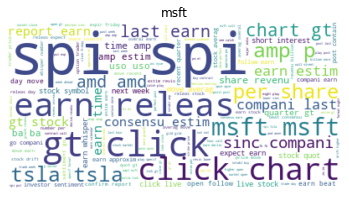

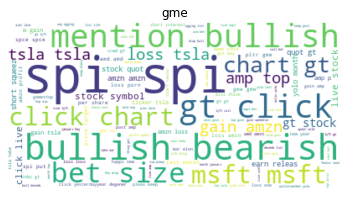

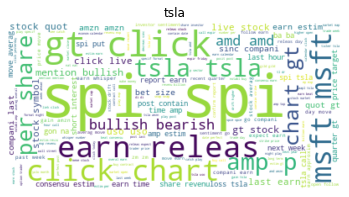

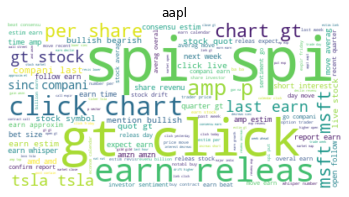

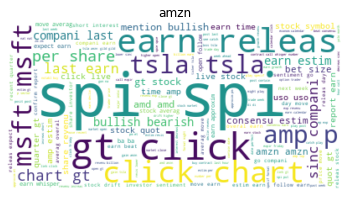

In [39]:
#6
#load modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Using word frequencies
for i in stock5:
    wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(corpora[i]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(i)
    plt.show()

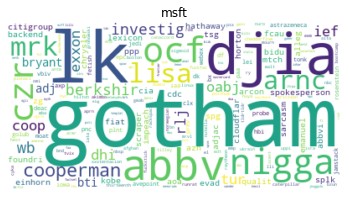

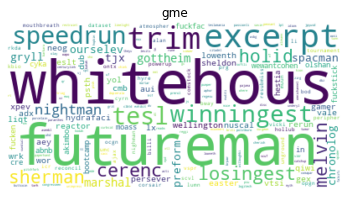

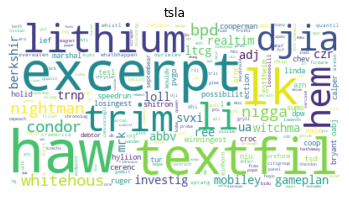

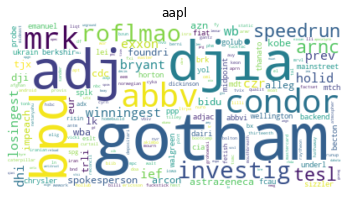

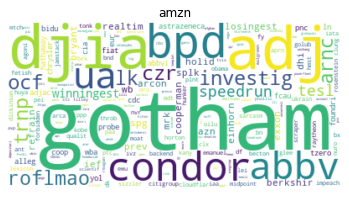

In [40]:
#Using word tf-idf weighting
for i in stock5:
    fdist = dict(nltk.FreqDist(corpora[i]))
    tf_idf_dict = {}
    for key in fdist:
        tf_idf_dict[key] = idf_dict[key] * fdist[key]
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(tf_idf_dict)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(i)
    plt.show()

It is a super nice way of representing our words. We can see that many of the comments include mentions of other stocks such as SPI or DJIA. More interestingly, it seems people were quite sure that there would happen something to AAPL, MSFT and AMZN once Palentir (PLTR) released Gotham, a software system for the US government. So we do indeed catch some interesting trends in these word clouds.

## Part 2: Sentiment analysis

In [98]:
#import libraries
import datetime as dt
from collections import Counter

#get data
daily_happiness = pd.read_csv(f'Week_7{os.sep}daily_happiness.csv')
daily_happiness.index = daily_happiness.time
daily_happiness = daily_happiness.drop('time' , axis=1)
daily_happiness.index = pd.to_datetime(daily_happiness.index)

from datetime import datetime
submissions["time"] = submissions["created_utc"].apply(lambda x: datetime.utcfromtimestamp(x).date())
doc_pr_day = submissions.groupby("time").tokens.sum()
doc_pr_day.index = pd.to_datetime(doc_pr_day.index)

Hedonometer = pd.read_csv(f"Week_7{os.sep}Hedonometer.csv", index_col="Word")


#1
#picking day, d
min_h, max_h = min(daily_happiness.tokens), max(daily_happiness.tokens)
d = daily_happiness[daily_happiness.tokens == min_h].index[0]
d #This is also the day it became clear, that Joe Biden was the 46th president of USA

Timestamp('2020-11-06 00:00:00')

In [99]:
#2
d_min = d - dt.timedelta(days=7)
l = doc_pr_day.loc[d]
l_ref = np.concatenate(doc_pr_day[(doc_pr_day.index < d) & (doc_pr_day.index > d_min)].values)

In [100]:
#3
p = dict([(item[0], item[1]/len(l)) for item in Counter(l).items()])
p_ref = dict([(item[0], item[1]/len(l)) for item in Counter(l_ref).items()])

In [107]:
#4
all_tokens = set(p.keys()).union(set(p_ref.keys()))
delta_p = dict([(token, p.get(token, 0) - p_ref.get(token, 0)) for token in all_tokens])
sorted(delta_p.items(), key = lambda x:x[1], reverse=True)[:10]

[('lend', 0.003829787234042553),
 ('pfizer', 0.002978723404255319),
 ('tighten', 0.0025531914893617024),
 ('standard', 0.002127659574468085),
 ('export', 0.002127659574468085),
 ('qe', 0.001702127659574468),
 ('voter', 0.001702127659574468),
 ('winter', 0.0012765957446808514),
 ('slowdown', 0.001276595744680851),
 ('rapidli', 0.001276595744680851)]

#### Write something pls

It is quite interesting to see Pfizer (the vaccine company), export and voter. 

In [108]:
#5
#Creating dict for happiness scores
labMT_dict = pd.Series(Hedonometer["Happiness Score"].values, index=Hedonometer.index).to_dict()
h = dict([(token, labMT_dict.get(token, np.nan)-5) for token in all_tokens])
delta_Phi = dict([(token, h[token]*delta_p[token]) for token in all_tokens if not np.isnan(h[token])])

In [109]:
#6
sorted(delta_Phi.items(), key = lambda x: np.abs(x[1]), reverse=True)[:10]

[('earn', -0.4468085106382979),
 ('like', -0.3977106382978723),
 ('pick', -0.3656170212765955),
 ('best', -0.3571489361702127),
 ('day', -0.31817872340425546),
 ('last', 0.29864680851063824),
 ('win', -0.27482553191489356),
 ('worst', 0.24804255319148938),
 ('market', -0.2407489361702128),
 ('good', -0.22842553191489365)]

In [112]:
#7
#!pip install shifterator

/Users/felixburmester/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


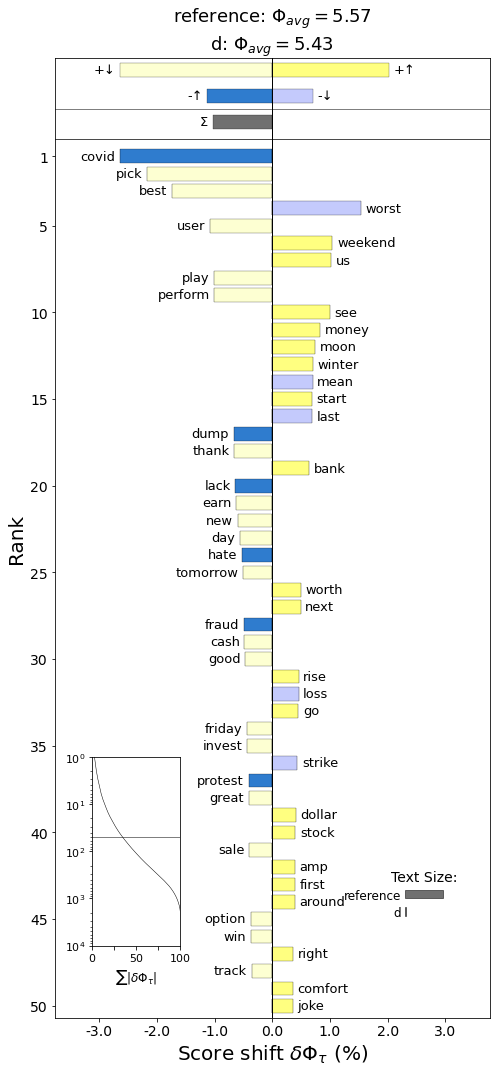

In [114]:
#8
import shifterator as sh
sentiment_shift = sh.WeightedAvgShift(
                        type2freq_1 = p_ref,
                        type2freq_2 = p,
                        type2score_1 = labMT_dict,
                        reference_value = 5
                )
sentiment_shift.get_shift_graph(detailed=True, 
                               system_names = ['reference', 'd'])
plt.show()

In [ ]:
#9


### Write some comments xDD

### Part 3: Communities for the Zachary Karate Club Network

In [117]:
#set font
import matplotlib as mpl
def setup_mpl():
    mpl.rcParams['font.family'] = 'Times New Roman'
    return
setup_mpl()

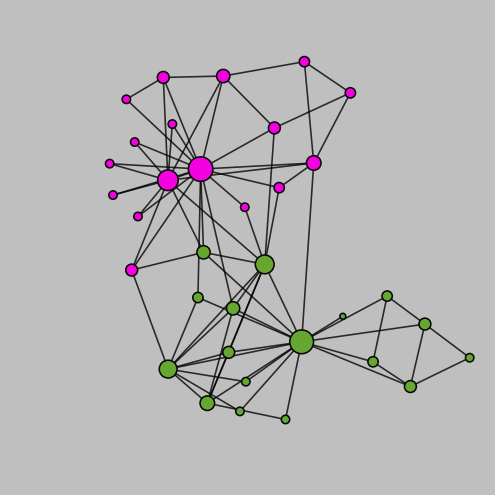

In [116]:
#1
%matplotlib inline
import networkx as nx
import netwulf as nw
import matplotlib.pyplot as plt

#Create graph and get node attributes for nw:
G = nx.karate_club_graph()
for k, v in G.nodes(data=True):
    v['group'] = v['club']; del v['club']

with plt.style.context('classic'):
    network, config = nw.interactive.visualize(G, plot_in_cell_below=False)
    fig, ax = nw.draw_netwulf(network)

In [123]:
#2
#Reload graph in order to keep club split called 'club'
G = nx.karate_club_graph()

#modularity function
def modularity(G: G, partitioning: list) -> float:
    L = len(G.edges())
    M = 0
    for partion in partitioning:
        subgraph = G.subgraph(partion).copy()
        L_c = subgraph.number_of_edges()
        K_c = sum(G.degree[node] for node in subgraph.nodes())
        M += (L_c/L) - (K_c/(2*L))**2
    return M

\#3

Modularity is a measure on how connected a community is. The higher the modularity, the better connected the community. A high modularity for an entire graph split into a certain partition means that the split is pretty decent.

In [124]:
#4
#Making optimal partition based on club splits
hi = {key for (key, value) in dict(nx.get_node_attributes(G, "club")).items() if value == 'Mr. Hi'}
officer = {key for (key, value) in dict(nx.get_node_attributes(G, "club")).items() if value == 'Officer'}

print('Modularity: ',modularity(G, [hi, officer]))
print('\nModularity with nx: ',nx_comm.modularity(G, [hi, officer]))

Modularity:  0.3582347140039447

Modularity with nx:  0.3582347140039448


In [263]:
#5
import random
def conf_model(G: G)->G:
    G_conf = G.copy()
    edges = list(G_conf.edges)
    source_nodes = [x[0] for x in edges]
    target_nodes = [x[1] for x in edges]
    
    #Concatenate stubs
    stubs = source_nodes + target_nodes
    
    #Shuffle stubs
    random.shuffle(stubs)
    
    #Get new edges
    new_edges = list(zip(stubs[0::2], stubs[1::2]))
    
    #Create a multigraph in order to accomodate multiple links
    G_conf = nx.MultiGraph()
    
    #Add edges
    G_conf.add_edges_from(new_edges)
    return G_conf

In [264]:
#6
G_conf = conf_model(G)
print('Degree of configurated graph: ',sum(dict(G_conf.degree()).values()))

print('\nDegree of real graph: ',sum(dict(G.degree()).values()))

Degree of configurated graph:  156

Degree of real graph:  156


In [265]:
#Optional!!!
#Define double edge swapping function
def double_edge_swap(G: G, N: int)->G:
    G_random = G.copy()
    num_swaps = 0
    while num_swaps < N:
        edges = list(G_random.edges)
        non_edges = list(nx.non_edges(G_random))
        (u,v), (x,y) = random.choices(edges, k=2) 
        if u==x or v==y: #Skipping due to same source or target
            continue 
        if (u,x) in non_edges and (v, y) in non_edges:
            G_random.add_edges_from([(u,x), (v, y)])
            G_random.remove_edges_from([(u, v), (x, y)])
            num_swaps += 1
    return G_random

G_des = double_edge_swap(G, 100)
print('Degree of double edge swapped graph: ',sum(dict(G_des.degree()).values()))

print('\nDegree of real graph: ',sum(dict(G.degree()).values()))

Degree of double edge swapped graph:  156

Degree of real graph:  156


The degrees are equal, yes. This is because we essentially just take all the edges and remove the links (while keeping the nodes). Then we shuffle the nodes (keeping the number of nodes intact) and create new links from node pairs. The degree wouldn't change because of any of these operations.

In [271]:
#7
#We will use the configurate model :)
conf_mods = []
for _ in tqdm(range(1000)):
    G_conf = conf_model(G)
    conf_mods.append(modularity(G_conf, [hi, officer]))

100%|██████████| 1000/1000 [00:01<00:00, 850.85it/s]


In [273]:
#8
print(f'The average modularity: {np.mean(conf_mods)}\nThe std: {np.std(conf_mods)}')

The average modularity: -0.0028678500986193942
The std: 0.057974302271488164


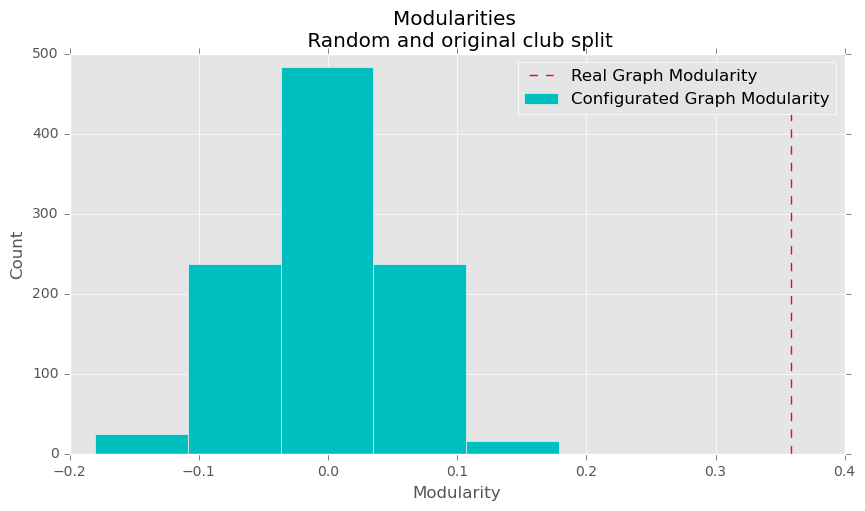

In [280]:
#9
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.hist(conf_mods, label="Configurated Graph Modularity", bins=5, color='c')
ax.axvline(modularity(G, [hi, officer]), linestyle='--', color='r', label="Real Graph Modularity")
ax.set_title("Modularities \n Random and original club split")
ax.set_xlabel("Modularity")
ax.set_ylabel("Count")
ax.legend()
plt.show()

\#10

Yes, the true split is a good split. This can be seen because the red line is on the far right of the x-axis and not within the cyan distribution. This tells us that our real graph has a better modularity than all of our random graphs which makes sense given the clustering property of real graphs (and especially the karate club graph). 

By preserving the nodes' degrees, we made sure that our random graphs have as many edges and as "spread out" as the true graph. By shuffling the edges we can see that the true graph does indeed have better clustering than a randomly shuffled graph would!

In [282]:
#11
from community import community_louvain
partition = community_louvain.best_partition(G)
partition_dict = {item: set() for (key, item) in partition.items()}
for (key, item) in partition.items():
    partition_dict[item].add(key)
print('True split: ',modularity(G, [hi, officer]))
print('\nLouvain split: ', modularity(G, list(partition_dict.values())))

True split:  0.3582347140039447

Louvain split:  0.4151051939513477


The modularity is in fact higher for the communities found by the louvain algorithm, which indicates that it is in fact more probable that there is four communities rather than two. This suggest that there is in fact subcommunities within the two karate clubs, which could be believable. The dataset is made on who the individuals interact with outside the karate club, and it could very well be the case that people have joined the karate clubs from different sub communities, which is something we aswell can recognize, I am more likely to join the same karate club as my friend is apart of.

Confusion matrix: 
 [[11.  0.  5.  1.]
 [ 0.  4.  0. 13.]]


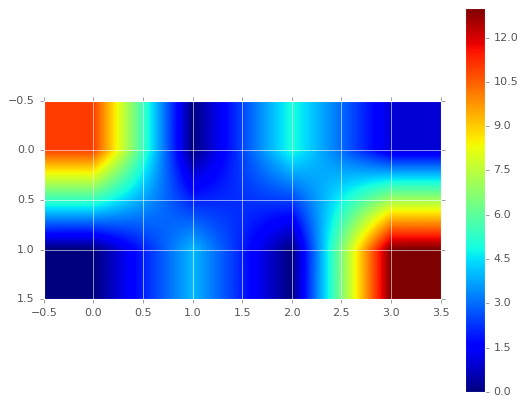

In [288]:
#12
D = np.zeros((2, len(partition_dict.keys())))
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        D[i, j] = sum([1 for x in partition_dict[j] if x in [hi, officer][i]])
print('Confusion matrix: \n',D)

#extra, because Felix just learned this command:
plt.imshow(D)
plt.colorbar()
plt.show()

The confusion matrix shows us that the two partitions (Officer and Mr. Hi) are spread into four partitions by the Louvain algorithm. Mr. Hi has been split into three different partitions while Officer seems to fit with two. With the exception of one person (D[0,3]), the two splits seem to agree with each other (in not mixing the nodes). So we know that the true split is quite good actually.

In [291]:
#13?
#Using the reciprocal graph because louvain assumes undirectedness
GME_graph = nx.read_gexf(f"Week_8{os.sep}reciprocal_reddit_community_GME.gexf")
communities = community_louvain.best_partition(GME_graph)
print(f'The amount of communities: {max(list(communities.values())) + 1}')

The amount of communities: 551


Text(0.5, 1.0, 'Size of each community in GME network')

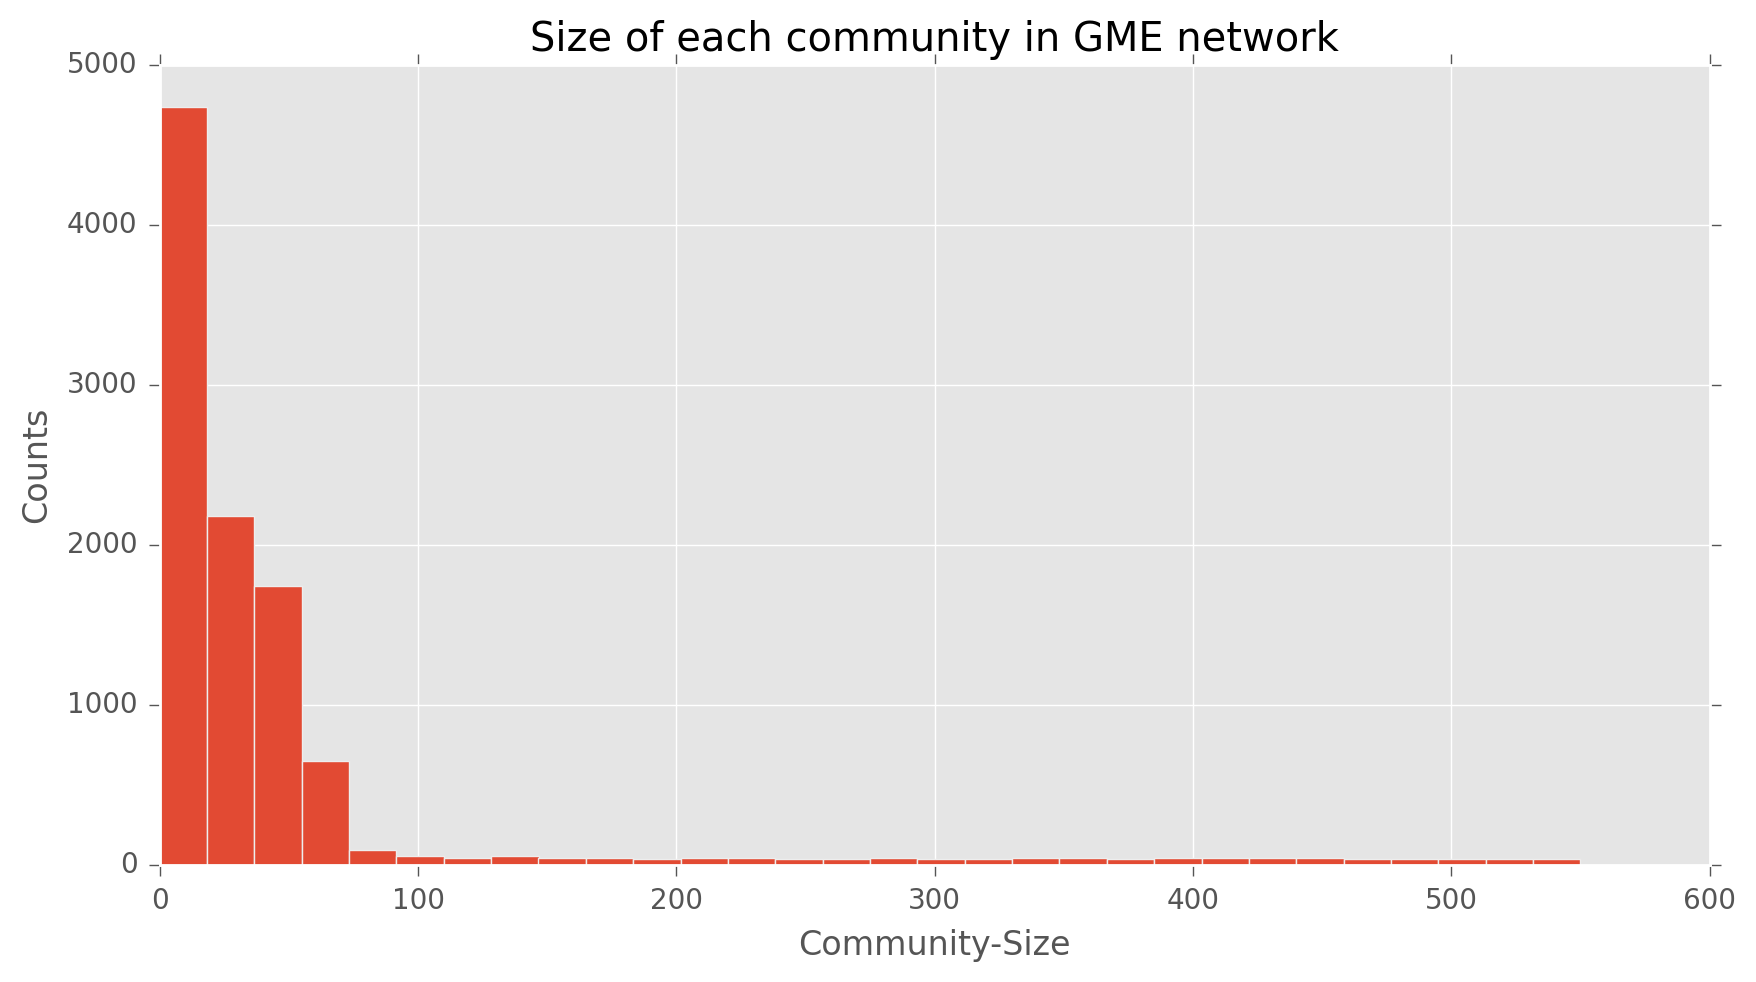

In [293]:
nx.set_node_attributes(GME_graph, communities, "louvain_community")
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
ax.hist(communities.values(), bins=30)
ax.set_ylabel("Counts")
ax.set_xlabel("Community-Size")
ax.set_title("Size of each community in GME network")

We see a heavy tail in the distribution. Hence, we could try a logarithmic binning and scale:

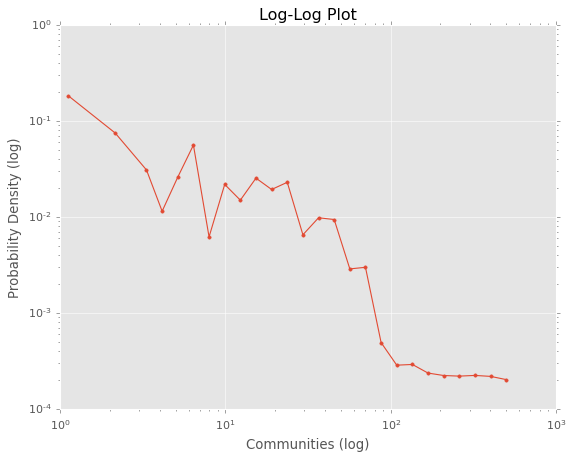

In [301]:
fig, ax = plt.subplots()
xx, yy = zip(*[(i,j) for (i,j) in zip(x, hist) if j > 0])
ax.plot(xx, yy, marker='.')
ax.set_ylabel("Probability Density (log)")
ax.set_xlabel("Communities (log)")
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('Log-Log Plot')
plt.show()

Does not quite seem to follow a power law given that the tail is not as heavy as expected. Subsequently lets calculate the modularity:

In [303]:
community_dict = {item: set() for (key, item) in communities.items()}
for (key, item) in communities.items():
    community_dict[item].add(key)
print('Modularity of the GME network: ',modularity(GME_graph, list(community_dict.values())))

Modularity of the GME network:  0.6115891079013841


We are then asked if it is signficiantly different from zero, which meerely by inspection of the computed modularity seems reasonable. One could make a t-test to see if the mean is different from 0, However, this seems a bit redundant and out of place given that we only have a single observation.

In [305]:
'''from infomap import Infomap
GME_graph_temp = nx.convert_node_labels_to_integers(GME_graph).copy()
im = Infomap("--two-level")
for edge in GME_graph_temp.edges():
    im.addLink(*edge)
im.run()
print(f"Found {im.num_top_modules} modules with codelength: {im.codelength}")
print("Result")
print("\n#node module")
communities = {}
for node in im.tree:
    if node.is_leaf:
        #print(node.node_id, node.module_id)
        communities[node.node_id] = node.module_id
nx.set_node_attributes(GME_graph_temp, communities, 'info_community')'''
x=1

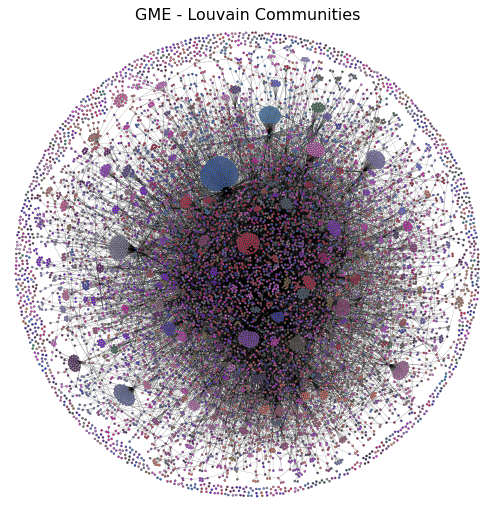

In [313]:
#14?
with plt.style.context('ggplot'):
    network, config = nw.visualize(nw.get_filtered_network(GME_graph, node_group_key='louvain_community'), plot_in_cell_below=False)
    fig, ax = nw.draw_netwulf(network)
    ax.set_title("GME - Louvain Communities")

In [314]:
#Found out 'ggplot' might be a better style to use <3